In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
stop final relax at some point
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info    : Function properties fo

{'seed': 0, 'set_used_fixed_h': np.False_, 'set_fixed_h': 3.7891088506196433, 'reduce_h_threshold': 1.8611728721136567e-05, 'reduce_h_amount': 0.0010409735239361947}


/mnt/d/packing/code/analysis/../core/pack_dynamics.py:59: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:90: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


Generation 0, Trees 40, Best cost: 0.18352859, Est: 0.45882149, h: 4.255066


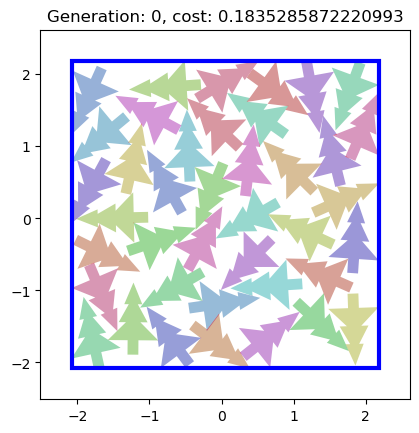

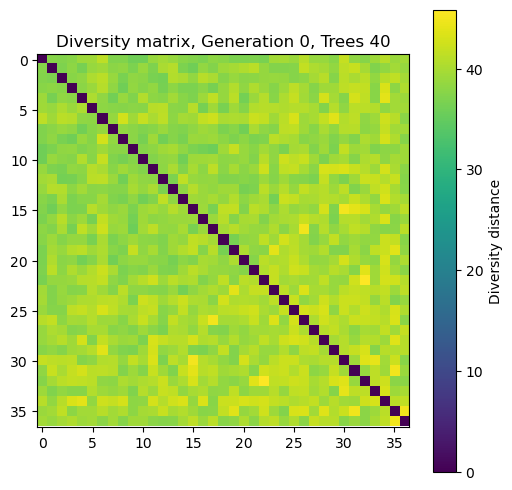

Generation 1, Trees 40, Best cost: 0.17436223, Est: 0.43590555, h: 4.151770


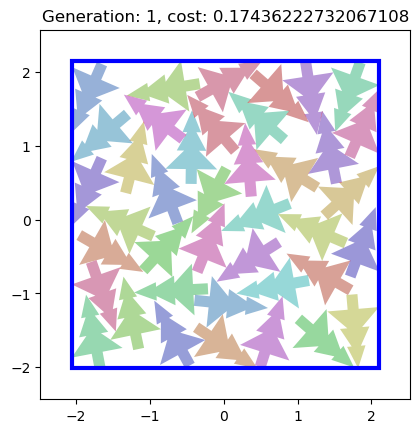

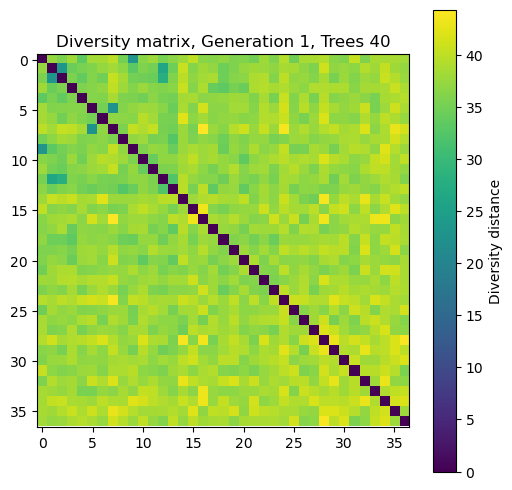

Generation 2, Trees 40, Best cost: 0.16546038, Est: 0.41365094, h: 4.046072


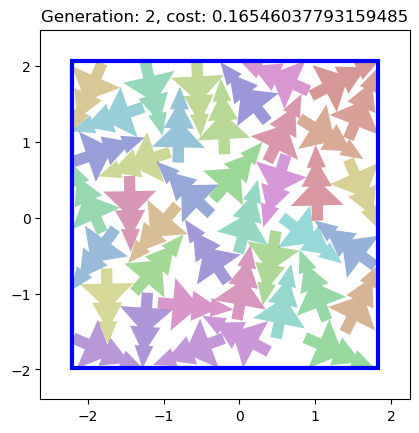

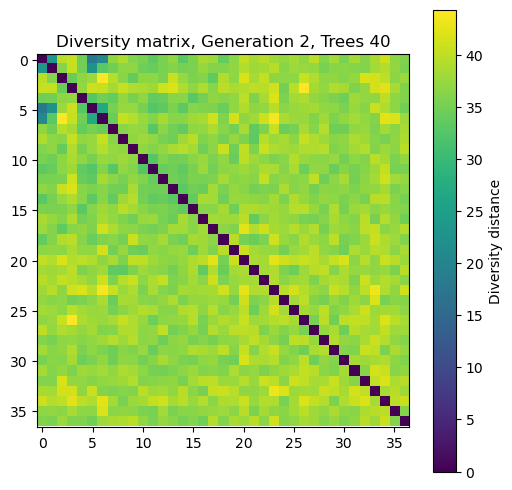

Generation 3, Trees 40, Best cost: 0.16280560, Est: 0.40701399, h: 4.014228


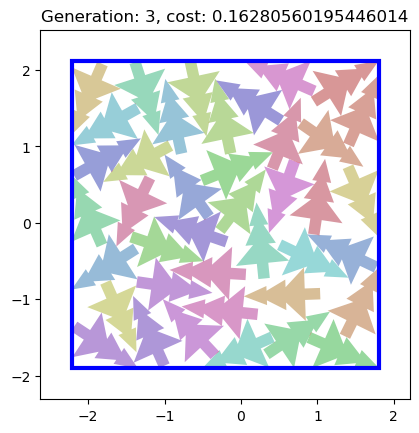

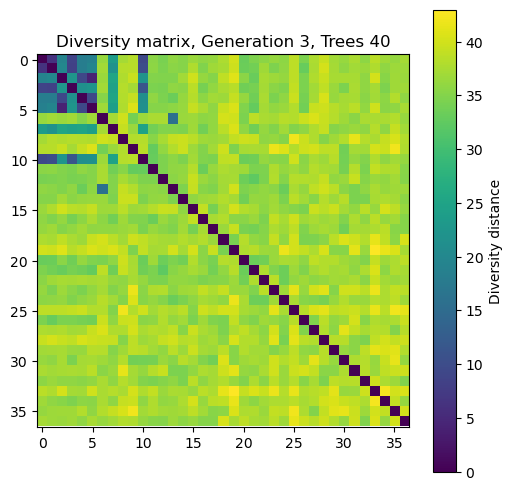

Generation 4, Trees 40, Best cost: 0.16028823, Est: 0.40072060, h: 3.981616


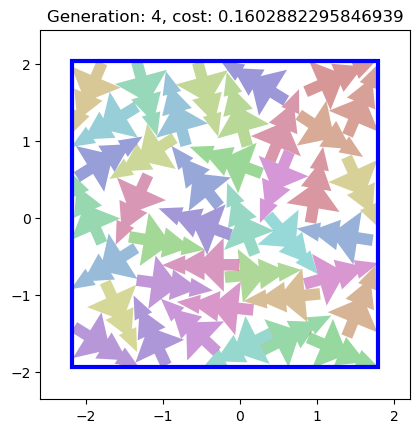

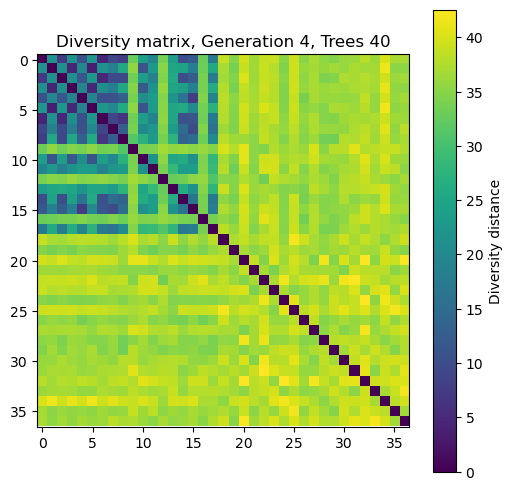

Generation 5, Trees 40, Best cost: 0.15873791, Est: 0.39684479, h: 3.964508


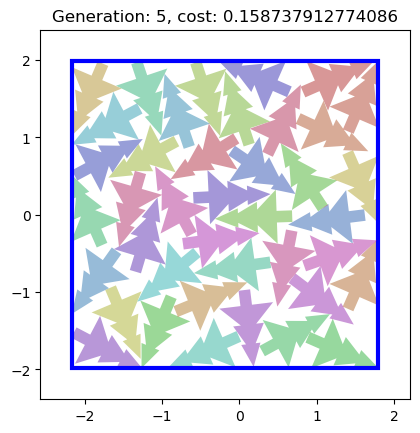

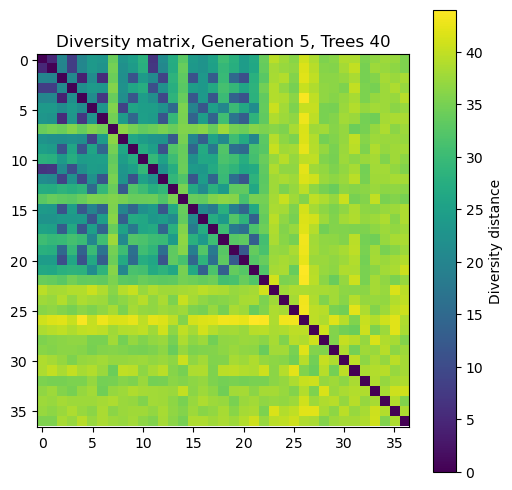

Generation 6, Trees 40, Best cost: 0.15667620, Est: 0.39169052, h: 3.936435


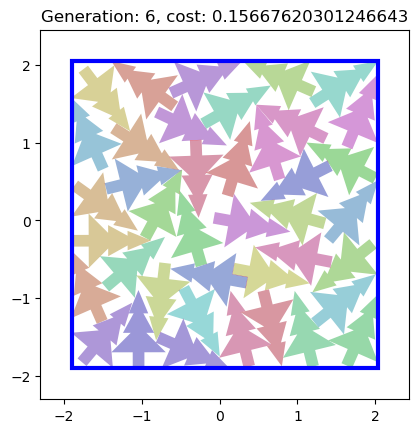

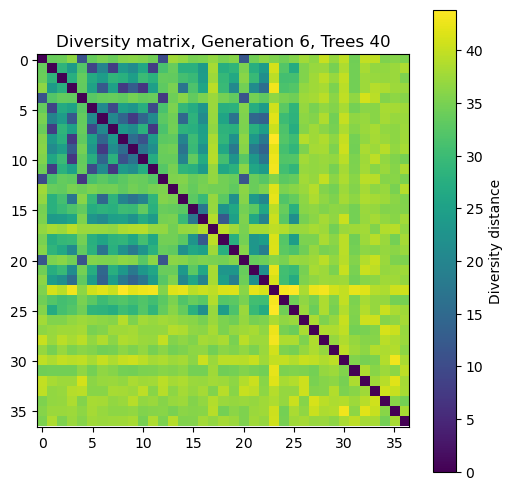

Generation 7, Trees 40, Best cost: 0.15579879, Est: 0.38949699, h: 3.927341


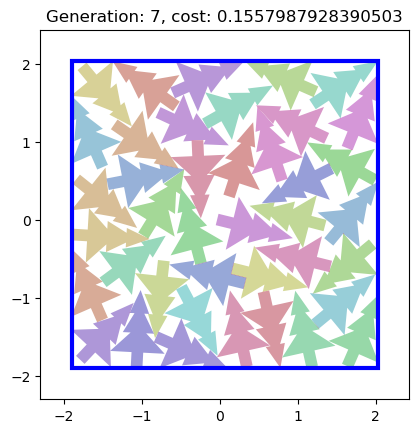

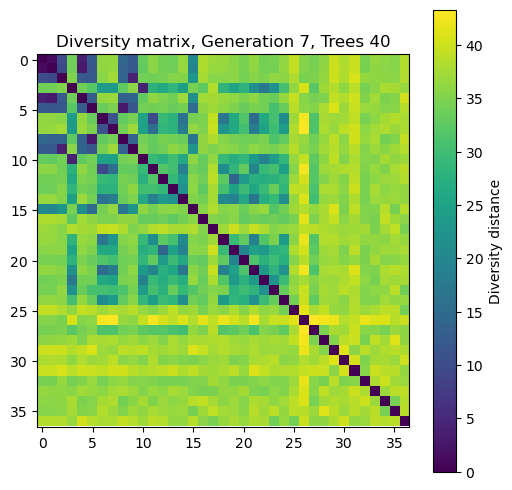

Generation 8, Trees 40, Best cost: 0.15446553, Est: 0.38616381, h: 3.913095


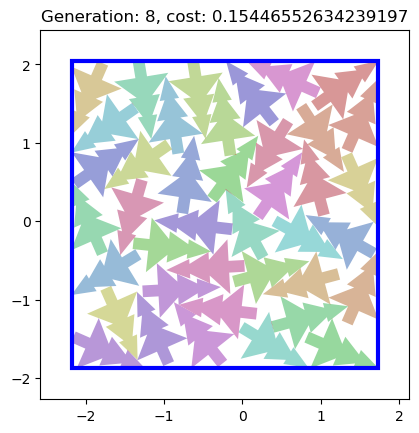

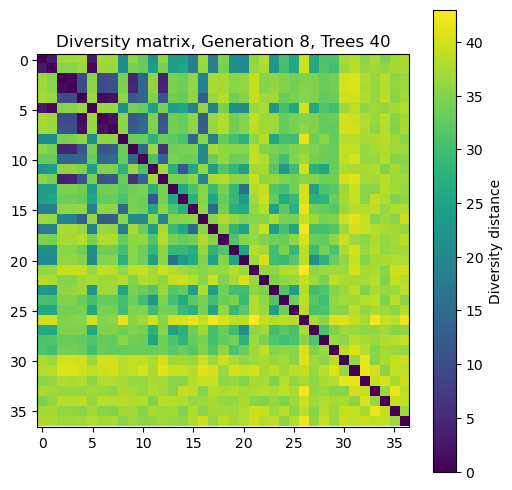

Generation 9, Trees 40, Best cost: 0.15380763, Est: 0.38451905, h: 3.902146


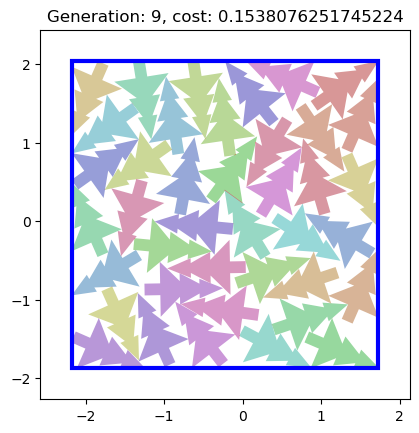

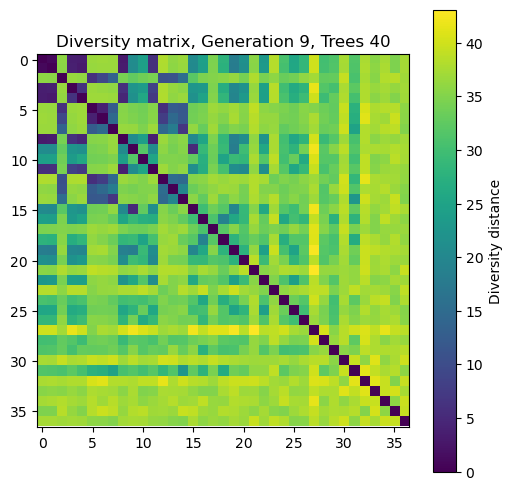

Generation 10, Trees 40, Best cost: 0.15308823, Est: 0.38272057, h: 3.891968


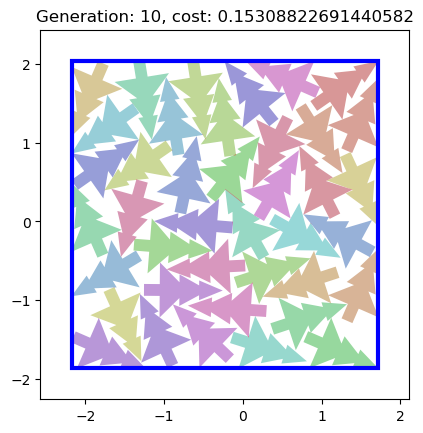

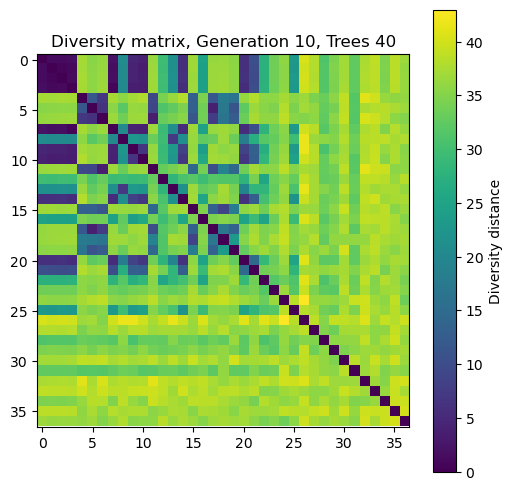

Generation 11, Trees 40, Best cost: 0.15245508, Est: 0.38113768, h: 3.885421


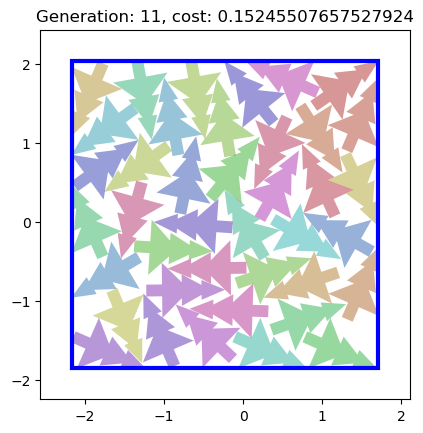

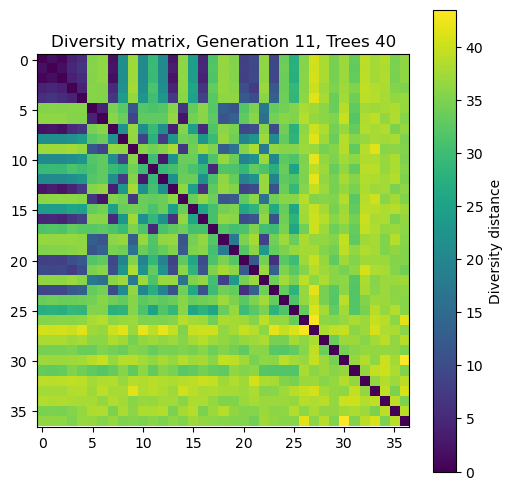

Generation 12, Trees 40, Best cost: 0.15180671, Est: 0.37951679, h: 3.877582


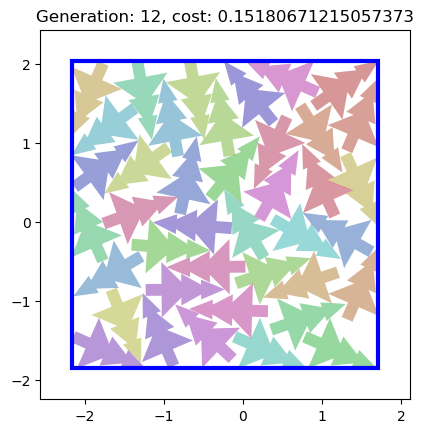

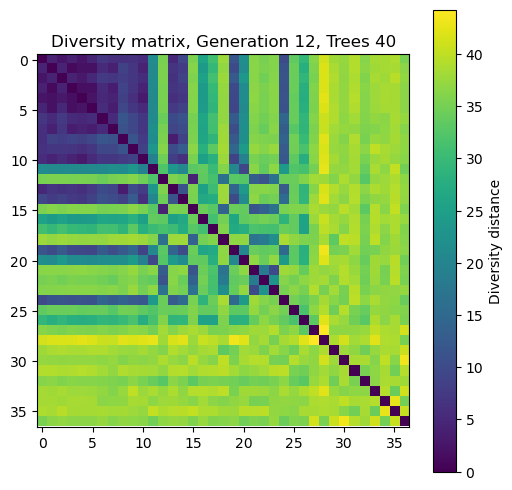

Generation 13, Trees 40, Best cost: 0.15156922, Est: 0.37892303, h: 3.873503


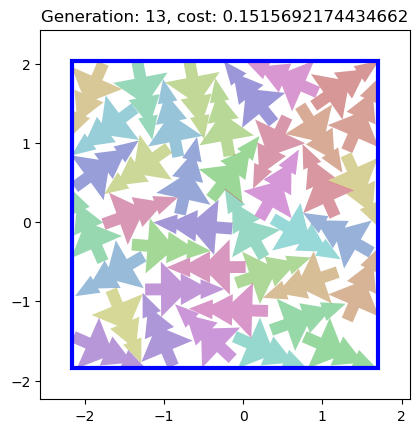

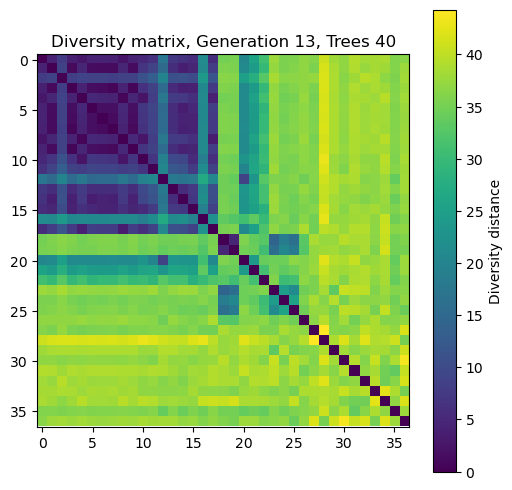

Generation 14, Trees 40, Best cost: 0.15096764, Est: 0.37741911, h: 3.862858


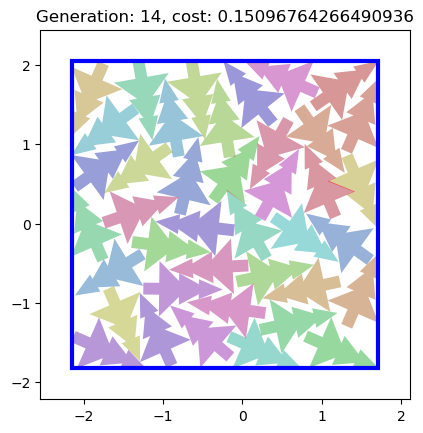

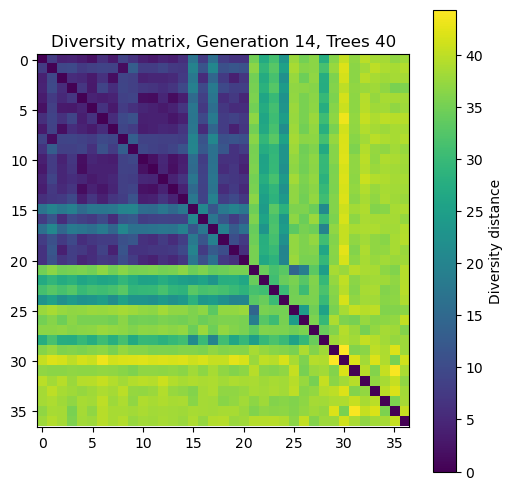

Generation 15, Trees 40, Best cost: 0.15035185, Est: 0.37587962, h: 3.858386


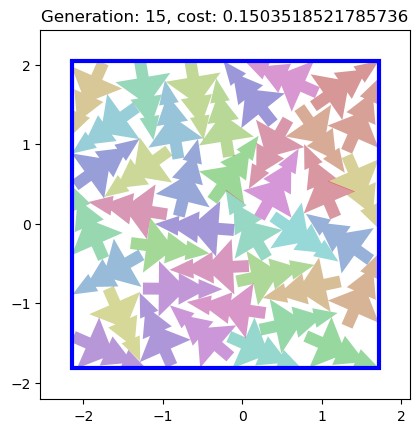

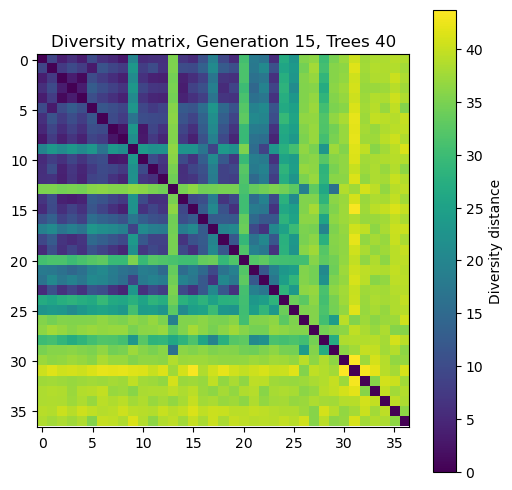

In [ ]:
import pack_runner
fastMode = False
runner = pack_runner.baseline_runner(fast_mode=False)

runner.base_ga.N_trees_to_do = np.array([40])
runner.base_ga.plot_fitness_predictors = False
runner.base_ga.plot_diversity_matrix = True
runner.base_ga.plot_champions = True

#runner.modifier_dict['set_used_fixed_h'] = pack_runner.pm(False, lambda r:r.choice([False]), pack_runner.set_used_fixed_h)
#runner.modifier_dict['set_fixed_h'] = pack_runner.pm(3.7, lambda r:r.uniform(4.,4.), pack_runner.set_fixed_h)
#runner.modifier_dict['reduce_h_amount'] = pack_runner.pm(1e-3, lambda r:r.uniform(1e-2, 2e-2), pack_runner.set_ga_prop)
kgs.profiling=False
runner.run()

In [ ]:
runner.result_ga.best_cost_per_generation

AttributeError: 'NoneType' object has no attribute 'best_cost_per_generation'

In [ ]:
kgs.dill_save(kgs.code_dir+'../../results/test_ga_result_ga.dill',runner.result_ga)